In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import AffinityPropagation
import distance

In [414]:
!pip install distance

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## Import data

In [415]:
with open('survey data.csv', 'r', encoding='utf-8') as file:
    df = pd.read_csv(file)
    

In [416]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     983 non-null    object
 1   Words    1017 non-null   object
 2   Weights  1017 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ KB


,Weights
count,1017.000000
mean,6.819076
std,2.862449
min,1.000000
25%,4.000000
50%,8.000000
75%,9.000000
max,10.000000


## Preprocessing

In [417]:
#change to all lower case
df['Words'] = df['Words'].str.lower()

#drop nulls
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 1016
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     983 non-null    object
 1   Words    983 non-null    object
 2   Weights  983 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 30.7+ KB


In [458]:
df['Date'].unique()

array(['9/8/21', '9/15/21', '9/22/21', '9/29/21', '10/6/21', '10/13/21',
       '10/20/21', '10/27/21', '11/3/21', '11/10/21'], dtype=object)

In [418]:
uni_w = df['Words'].unique()

print('Unique words in data : {}'.format(len(uni_w)))

Unique words in data : 459


In [419]:
#find similar words among unique words - levenshtein distance method
words = np.asarray(uni_w)
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

w_dict = {}

affprop = AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))
    w_dict[exemplar] = cluster

 - *descriptive:* descriptive, descriptive , descriptive model, prescriptive
 - *dataset:* data, data set, data set , databases, dataset, dataset , datasets, discrete, parameter
 - *customised icon sets:* customised icon sets
 - *statistics:* soft skills, statistical, statistics
 - *metrics:* categorical, empirical, james r evans, matrix, methods, metric, metrics, metrics , netflix, regions, rubrics
 - *bin range:* average, big data, bin range, bin ranges, linked in, mid range, midrange, namerange, significance
 - *percentile:* air conditioner, form contrils, inferential, interval estimate, percentage, percentile, percentiles, predictive
 - *measures of loc:* measures of loc, measures of location
 - *variance:* confidence, covariance, variable, variance, variety
 - *probability:* probability, probability , probabilty , probablity, probaility
 - *sampling error:* sample error, sampling data, sampling error, sampling errors, standard error
 - *estimations:* applications, estimation, esti

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


In [420]:
#switch key and values
w_dict2 = {}
for k, v in w_dict.items():
    for word in v:
        w_dict2[word] = k

In [421]:
#map
df['lev_cluster'] = df['Words'].map(w_dict2)

In [422]:
np.asarray(list(w_dict.keys()))

array(['descriptive', 'dataset', 'customised icon sets', 'statistics',
       'metrics', 'bin range', 'percentile', 'measures of loc',
       'variance', 'probability', 'sampling error', 'estimations',
       'rapid miner', 'hypothesis', 'decision support ',
       'excel functions', 'pareto analysis', 'analytic', 'group project',
       'evolution of business systems', 'graph', 'store', 'iot',
       'operations research', 'vlookup', 'pivot tables',
       'simulation risk analysis', 'data mining',
       'sampling and estimation', 'statistical inference', 'data bars',
       'histograms', 'ranges', 'formulas', 'visual data', 'scatter graph',
       'picture about business analytics', 'test', 'data visualization',
       'amazon recoomendation', 'price elasticity - milk/chocolates',
       'function', 'experiment', 'mutually exclusive events',
       'population', 'model', 'trend line', 'structured', 'continuous',
       'boolean', 'bernouli', 'sample', 'measure', 'excel sheet',
     

In [423]:
#manual higher cluster

stats = ['statistics', 'metrics', 'percentile',  'variance' , 'probability' , 'sampling error',   'estimations',  'hypothesis',  'ranges', 'test',  'experiment', 'mutually exclusive events',  'population', 'model', 'trend line', 'structured', 'continuous',  'boolean', 'bernouli', 'sample', 'measure',  'probabliy distribution',  'statistical sampling',  'parallel coordinates', 'normal distribution', 'chebyshev', 'quartile functionalities', 'cummulative frequency', 'discrete probability', 'binomial', 'continous random variable', 'continous probability', 'confidence  interval for proprotions',   'confidence  interval with known sd', 'combination',  'distributions',  'linear regression', 'confidence interval']
analytics = ['descriptive' ,   'decision support ',  'pareto analysis', 'analytic',  'evolution of business systems',  'operations research', 'simulation risk analysis', 'sampling and estimation', 'statistical inference',  'picture about business analytics',  'business modeling',   'descriptive analytics', 'veracity', 'data analytics',  'business analytics',  'predictive analysis',  'emperical rules']
excel = ['excel functions', 'vlookup', 'pivot tables',  'function', 'excel sheet',  'filters']
vis = ['bin range',  'graph',  'histograms', 'formulas', 'visual data', 'scatter graph',  'data visualization', 'pie chart']
data = ['dataset', 'data mining', 'data bars', 'relative data']
tool = ['rapid miner']
school = ['group project',   'project objective discussion']
etc = ['customised icon sets', 'measures of loc', 'store', 'iot',  'amazon recoomendation', 'price elasticity - milk/chocolates',   'radio button', 'internet of things']

manual_dict = {'statistics': stats,
              'analytics': analytics,
              'excel':excel,
              'visualization': vis,
              'data':data,
              'tools':tool,
              'school-work':school,
              'etc':etc}

In [424]:
#switch key and values
manual_dict2 = {}
for k, v in manual_dict.items():
    for word in v:
        manual_dict2[word] = k
#map
df['manual_cluster'] = df['lev_cluster'].map(manual_dict2)

In [425]:
#find keywords
def find_keyword(uni_w, word):
    words = []
    for i in range(len(uni_w)):
        if str(uni_w[i]).find(word) != -1:
            words.append(uni_w[i])
    return words

print(find_keyword(uni_w, 'analysis'))
print(find_keyword(uni_w, 'analytics'))

['pareto analysis', 'descriptive analysis', 'quantitative analysis', 'simulation risk analysis', 'analysis', 'regression analysis', 'data analysis', 'statistical analysis', '80:20 pareto analysis', 'prespective analysis', 'predictive analysis', 'business analysis', 'chart for data analysis']
['analytics', 'flowchart of analytics', 'picture about business analytics', 'google analytics', 'demystifying analytics', 'prescriptive analytics', 'descriptive analytics', 'predictive analytics', 'data analytics', 'business analytics', 'big data analytics']


In [426]:
df.to_csv('processed_survey_data.csv')

## EDA by lecture date

In [427]:
#descriptive statistics for weights
df.groupby('Date').agg(['mean', 'count'])

Weights      
              mean count
Date                    
10/13/21  6.709091   110
10/20/21  6.792079   101
10/27/21  6.265306    98
10/6/21   7.317308   104
11/10/21  4.885714    35
11/3/21   7.019608   102
9/15/21   6.582609   115
9/22/21   7.103774   106
9/29/21   6.677419    93
9/8/21    6.857143   119

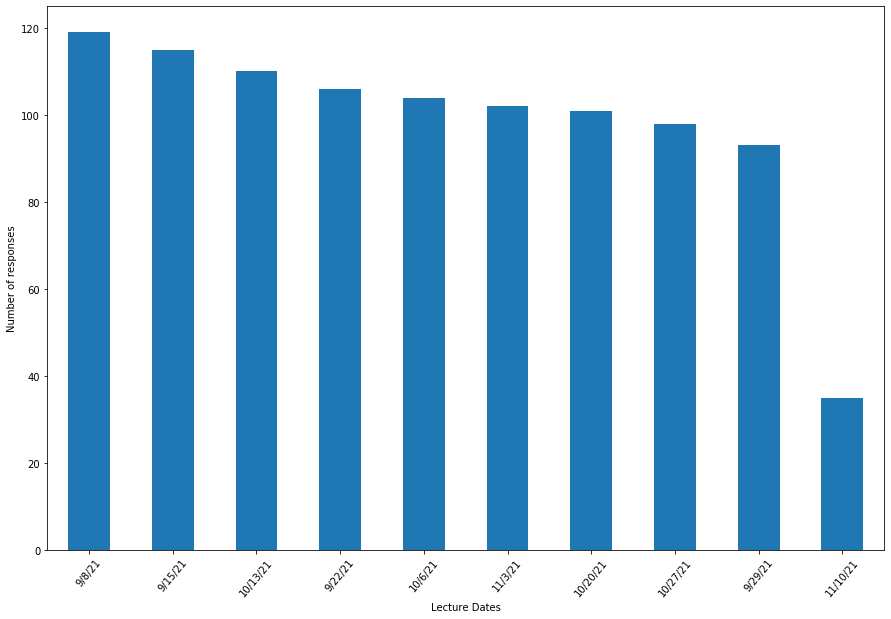

In [428]:
plt.figure(figsize=(15,10))
df.groupby('Date').size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Lecture Dates")
plt.ylabel("Number of responses")
plt.show()

In [429]:
word_count = df['Words'].value_counts().nlargest(10)

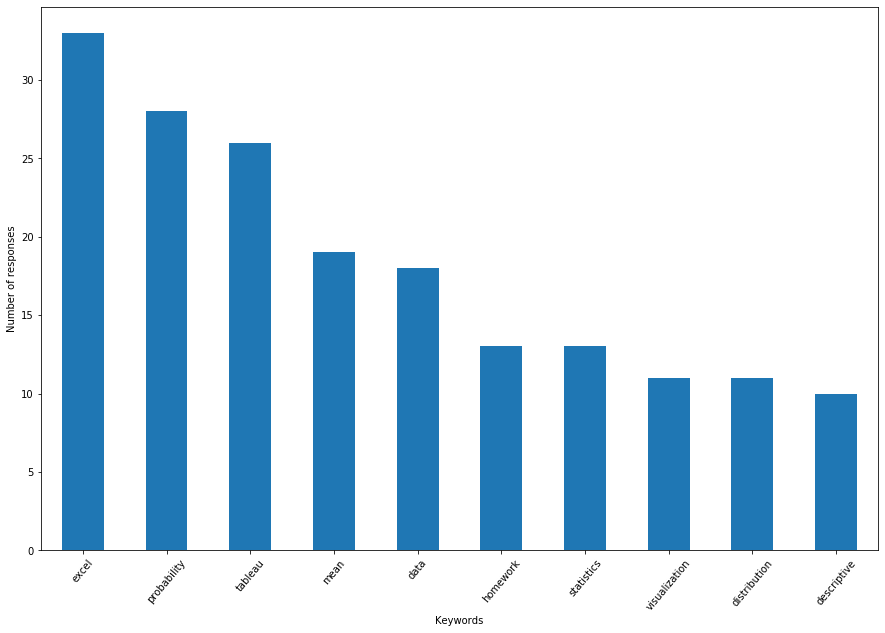

In [430]:
plt.figure(figsize=(15,10))
word_count.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Keywords")
plt.ylabel("Number of responses")
plt.show()

In [405]:
sept8_df['Words'].value_counts().nlargest(20)
df.groupby('Date')

In [455]:
df

,Date,Words,Weights,lev_cluster,manual_cluster
0,9/8/21,analytics,10,analytic,analytics
1,9/8/21,models,9,model,statistics
2,9/8/21,descriptive,10,descriptive,analytics
3,9/8/21,data base,4,data bars,data
4,9/8/21,predictive,6,percentile,statistics
...,...,...,...,...,...
1012,10/20/21,sampling,9,sample,statistics
1013,10/20/21,standard deviation,9,linear regression,statistics
1014,10/27/21,standard error,8,sampling error,statistics
1015,11/3/21,proportion,10,population,statistics


## word cloud

In [392]:
#wordcloud import
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

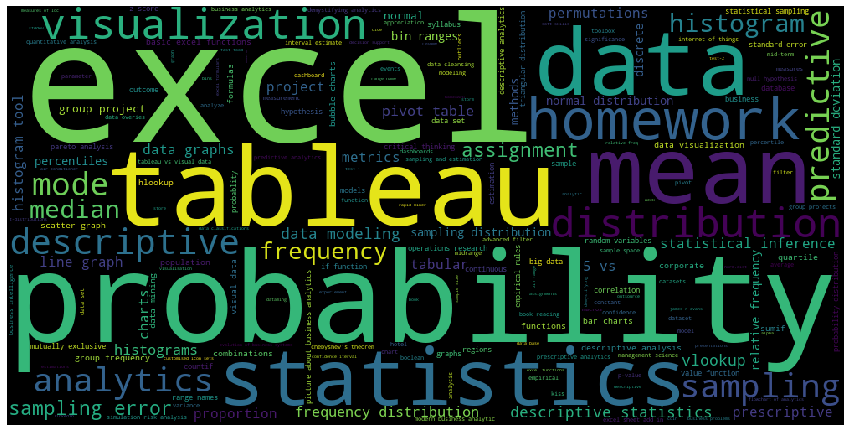

In [394]:
#convert it to dictionary with values and its occurences
from collections import Counter
word_could_dict=Counter(list(df['Words']))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

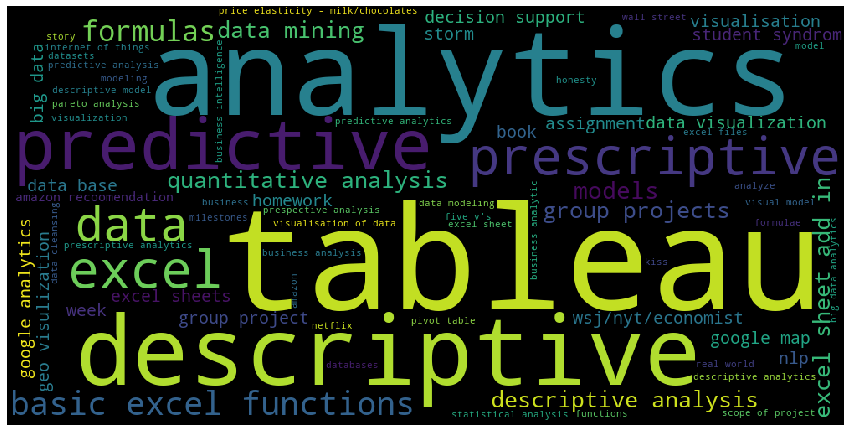

In [451]:
#9/8
sept8_df = df.loc[df['Date']=='9/8/21']
word_could_dict=Counter(list(sept8_df['Words']))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

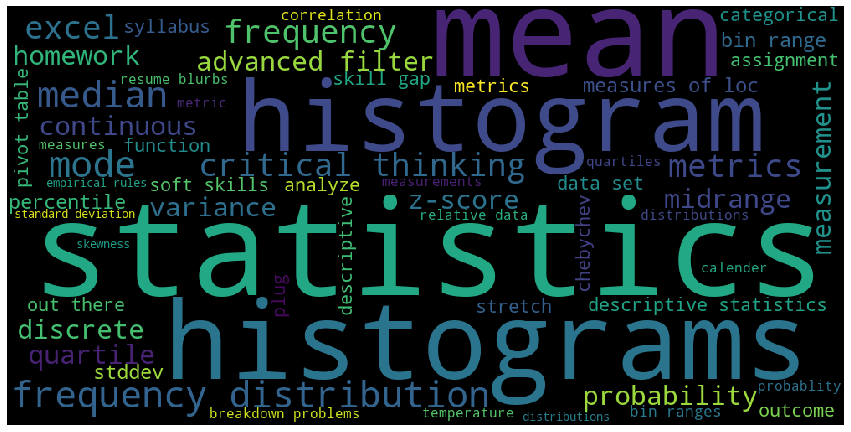

In [452]:
# 10/6
sept8_df = df.loc[df['Date']=='10/6/21']
word_could_dict=Counter(list(sept8_df['Words']))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

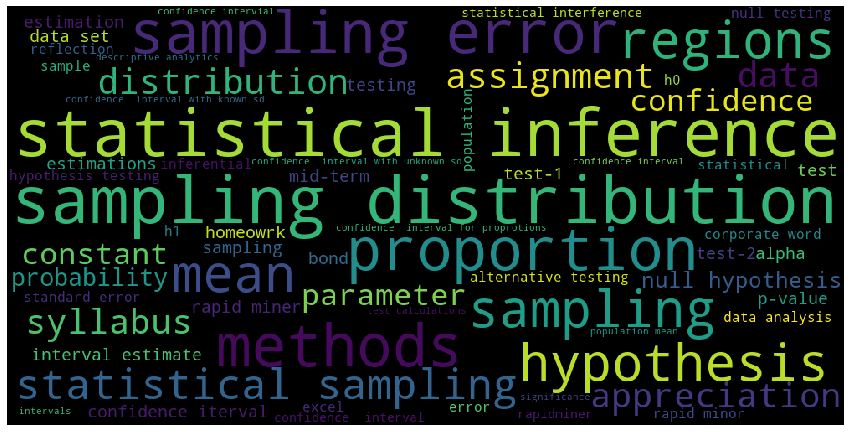

In [453]:
# 11/3
sept8_df = df.loc[df['Date']=='11/3/21']
word_could_dict=Counter(list(sept8_df['Words']))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

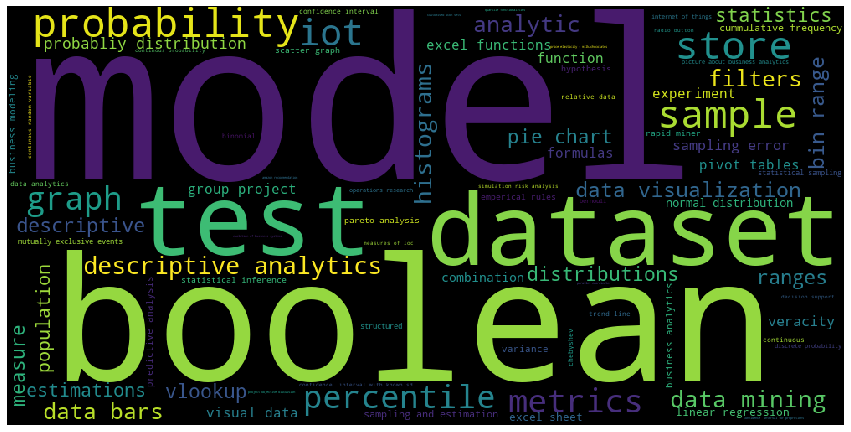

In [457]:
#manual cluster
word_could_dict=Counter(list(df['lev_cluster']))
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()